##### 1. Importing libraries:

In [72]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns


In [73]:
%matplotlib inline

In [74]:
import warnings
warnings.filterwarnings("ignore")

In [75]:
pd.set_option("display.max_columns", 50)

##### 2. Importing data:

In [76]:
df = pd.read_csv("heart_v2.csv")
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


###### 2.1 Data check:

In [77]:
df.tail()

,age,sex,BP,cholestrol,heart disease
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0
269,67,1,160,286,1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [79]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [80]:
df.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

##### 3. Data Preparation for modelling:

In [81]:
# splitting response and predictor variables:
x = df.drop("heart disease", axis = 1)
y = df["heart disease"]


In [82]:
# importing necessary libraries:
from sklearn.model_selection import train_test_split

In [83]:
x_train, x_test,y_train,y_test = train_test_split(x,y, train_size=0.7, random_state=50)

In [84]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(189, 4)
(81, 4)
(189,)
(81,)


##### 4. Modelling:

Fiiting the decision tree with default hyper parameters with maximum depth of 3

In [85]:
# importing libraries:
from sklearn.tree import DecisionTreeClassifier

In [86]:
# instantiasation:
dt = DecisionTreeClassifier(max_depth=3)

In [87]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [88]:
# importing packages for graphic visualization:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

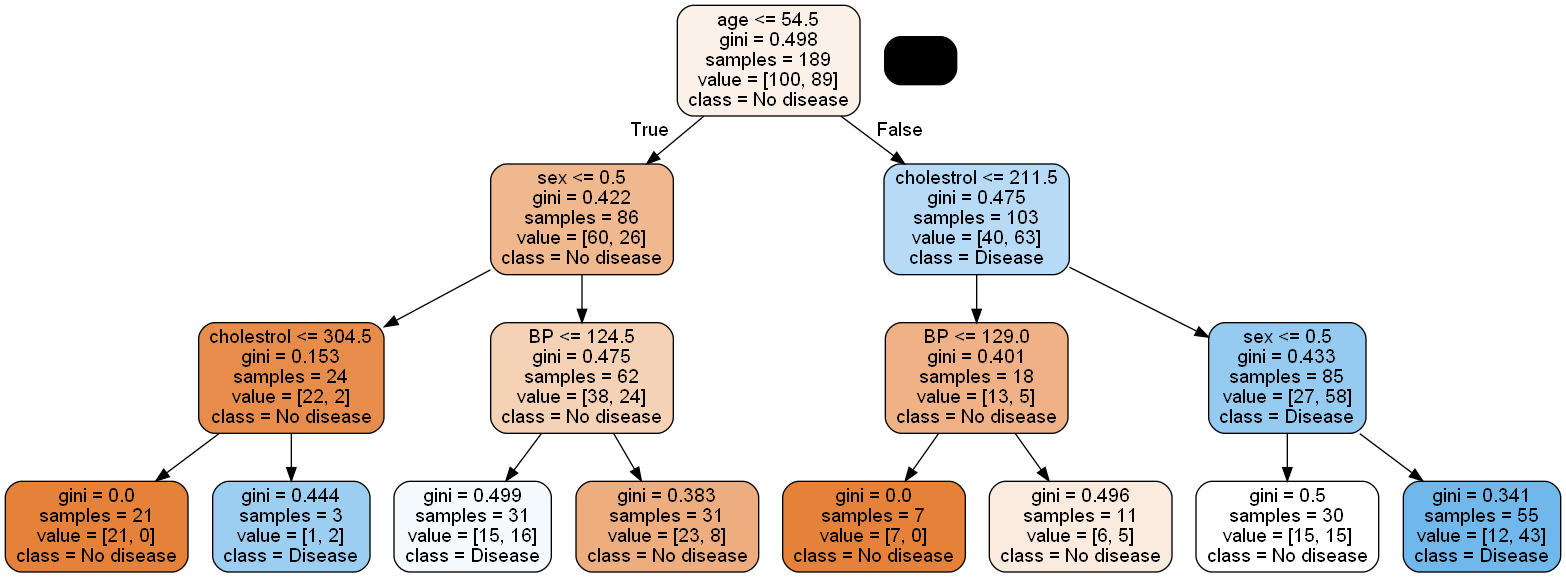

In [89]:
# plotting the tree:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, feature_names=x.columns, 
                class_names=["No disease", "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

##### 4. Model Evaluation:

In [90]:
y_train_pred  = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [92]:
confusion_matrix(y_train,y_train_pred)

array([[72, 28],
       [28, 61]], dtype=int64)

In [93]:
accuracy_score(y_train,y_train_pred)

0.7037037037037037

In [94]:
confusion_matrix(y_test,y_test_pred)

array([[35, 15],
       [13, 18]], dtype=int64)

In [95]:
accuracy_score(y_test,y_test_pred)

0.654320987654321

In [96]:
# creating a  function to plot the visualizartion:
def get_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file= dot_data, rounded= True, filled= True, 
                    feature_names=x.columns, class_names= ["No disease", "Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [97]:
def evaluate_model(dt_classifier):
    print("Train set Accuracy", accuracy_score(y_train, dt_classifier.predict(x_train)))
    print("Confusion matrix for train set")
    print(confusion_matrix(y_train, dt_classifier.predict(x_train)))
    print("--------")
    print("Test set Accuracy", accuracy_score(y_test, dt_classifier.predict(x_test)))
    print("Confusion matrix for test set")
    print(confusion_matrix(y_test, dt_classifier.predict(x_test)))
    

##### Without setting hyper parameters:

In [98]:
dt_1 = DecisionTreeClassifier(random_state=50)
dt_1.fit(x_train,y_train)

DecisionTreeClassifier(random_state=50)

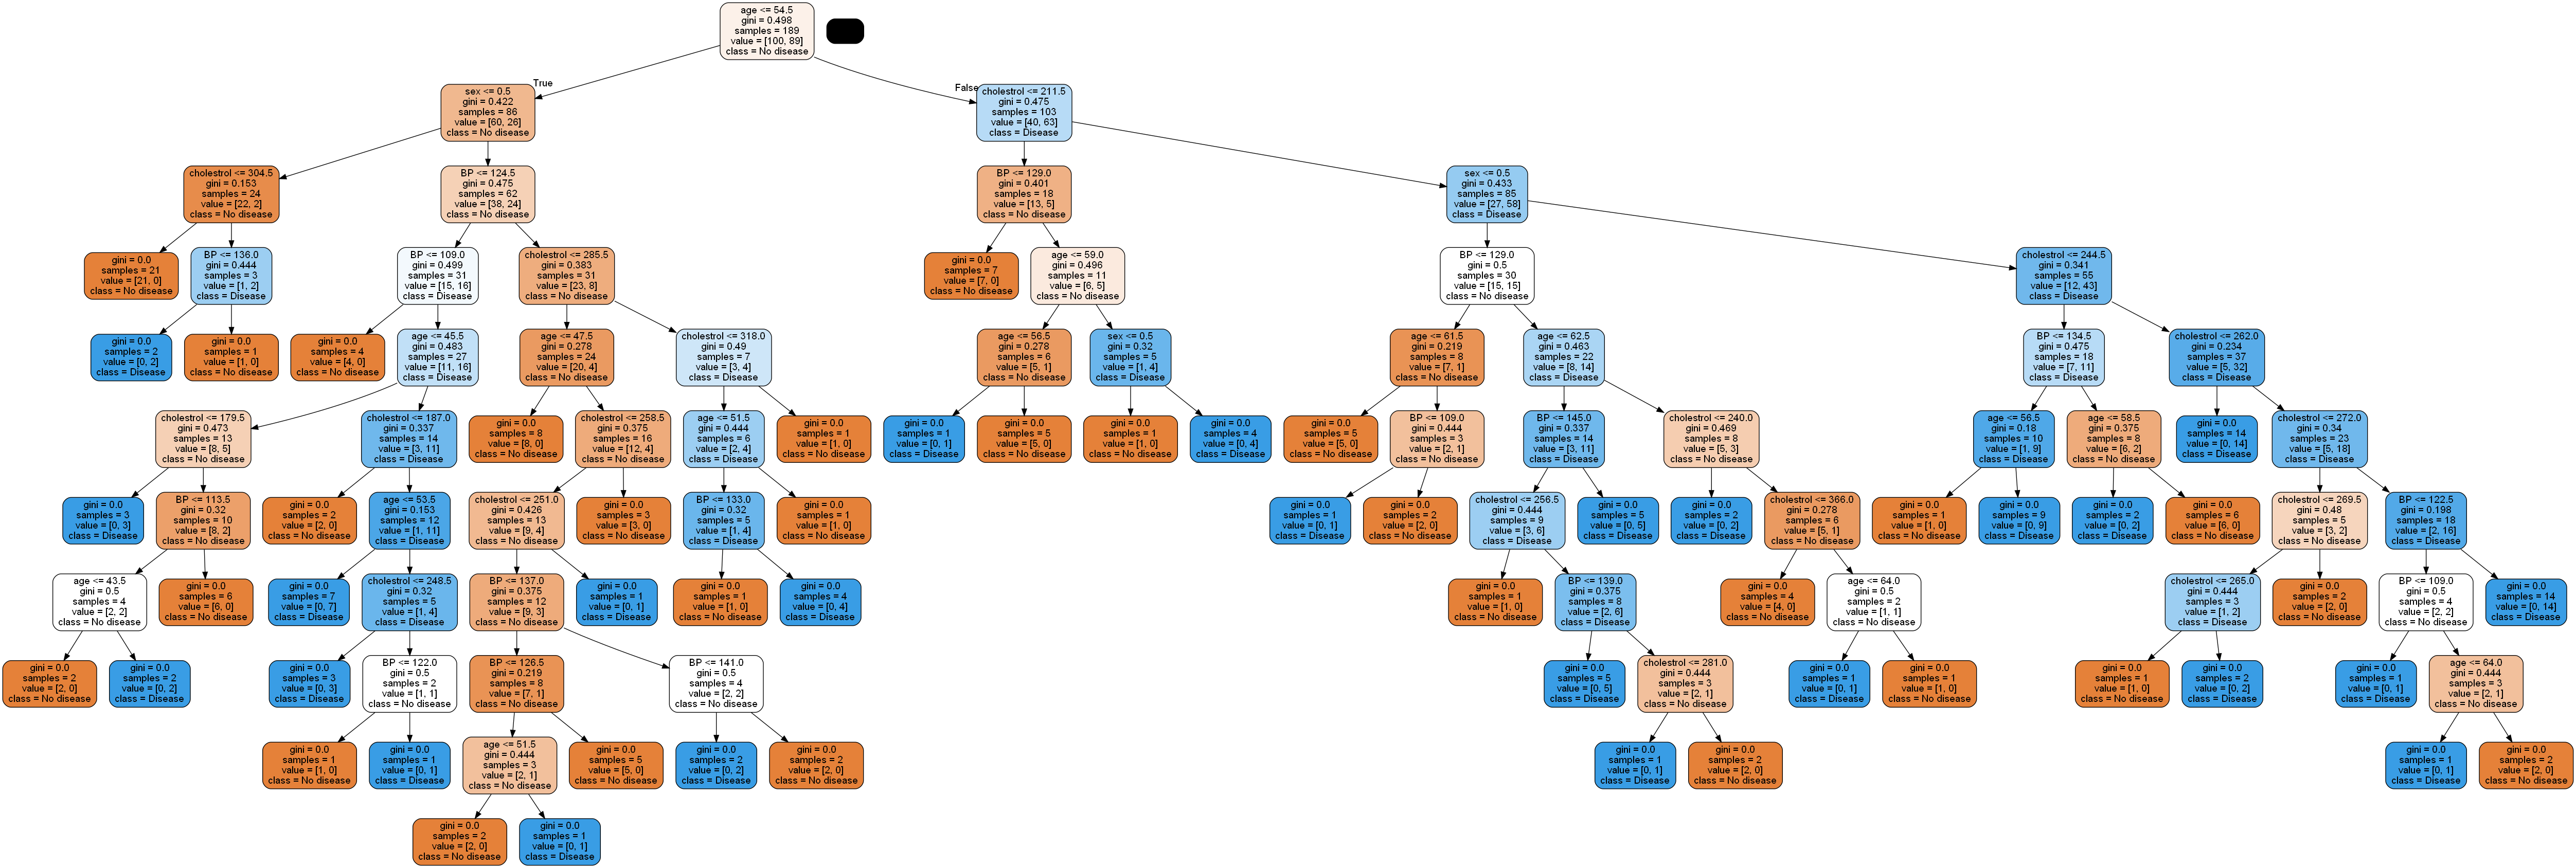

In [99]:
Graph = get_graph(dt_1)
Image(Graph.create_png())

In [100]:
evaluate_model(dt_1)

Train set Accuracy 1.0
Confusion matrix for train set
[[100   0]
 [  0  89]]
--------
Test set Accuracy 0.6049382716049383
Confusion matrix for test set
[[35 15]
 [17 14]]


##### Controlling the depth of the tree with max_depth = 3

In [101]:
dt_2 = DecisionTreeClassifier(max_depth=3)
dt_2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

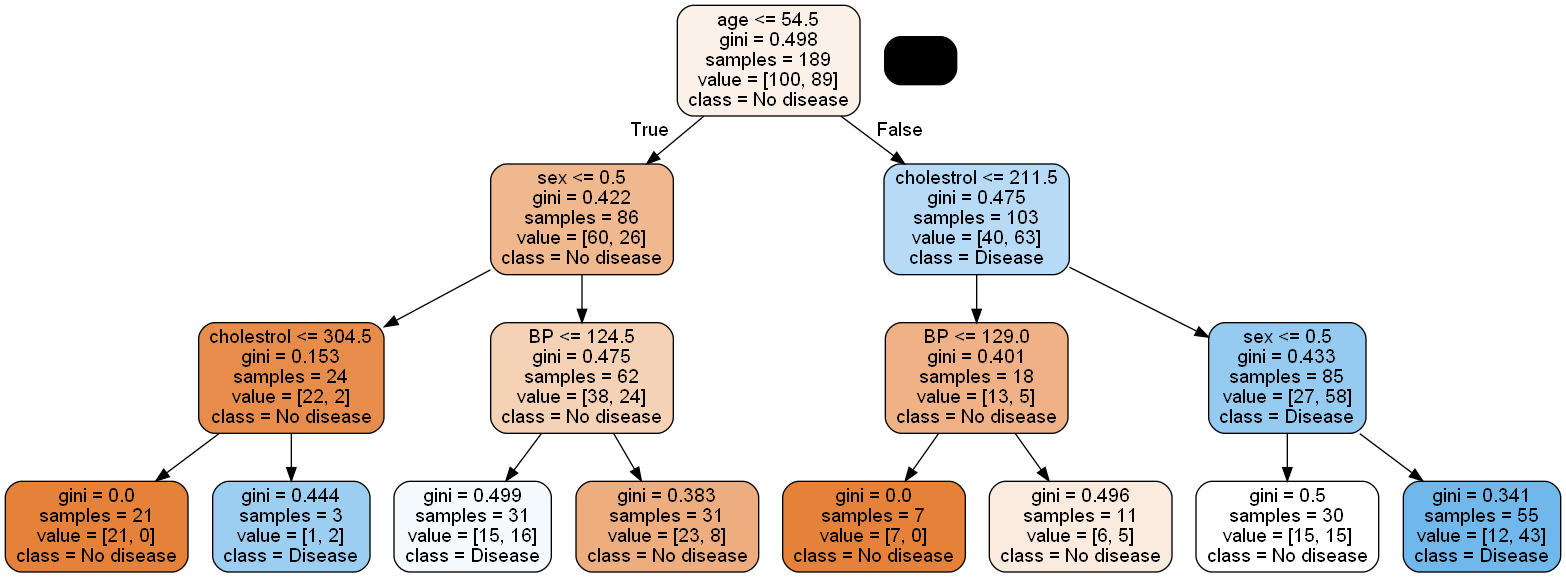

In [102]:
Graph2=get_graph(dt_2)
Image(Graph2.create_png())

In [103]:
evaluate_model(dt_2)

Train set Accuracy 0.7037037037037037
Confusion matrix for train set
[[72 28]
 [28 61]]
--------
Test set Accuracy 0.654320987654321
Confusion matrix for test set
[[35 15]
 [13 18]]


##### Controlling min_sample_split = 20

In [104]:
dt_3 = DecisionTreeClassifier(min_samples_split=20)
dt_3.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=20)

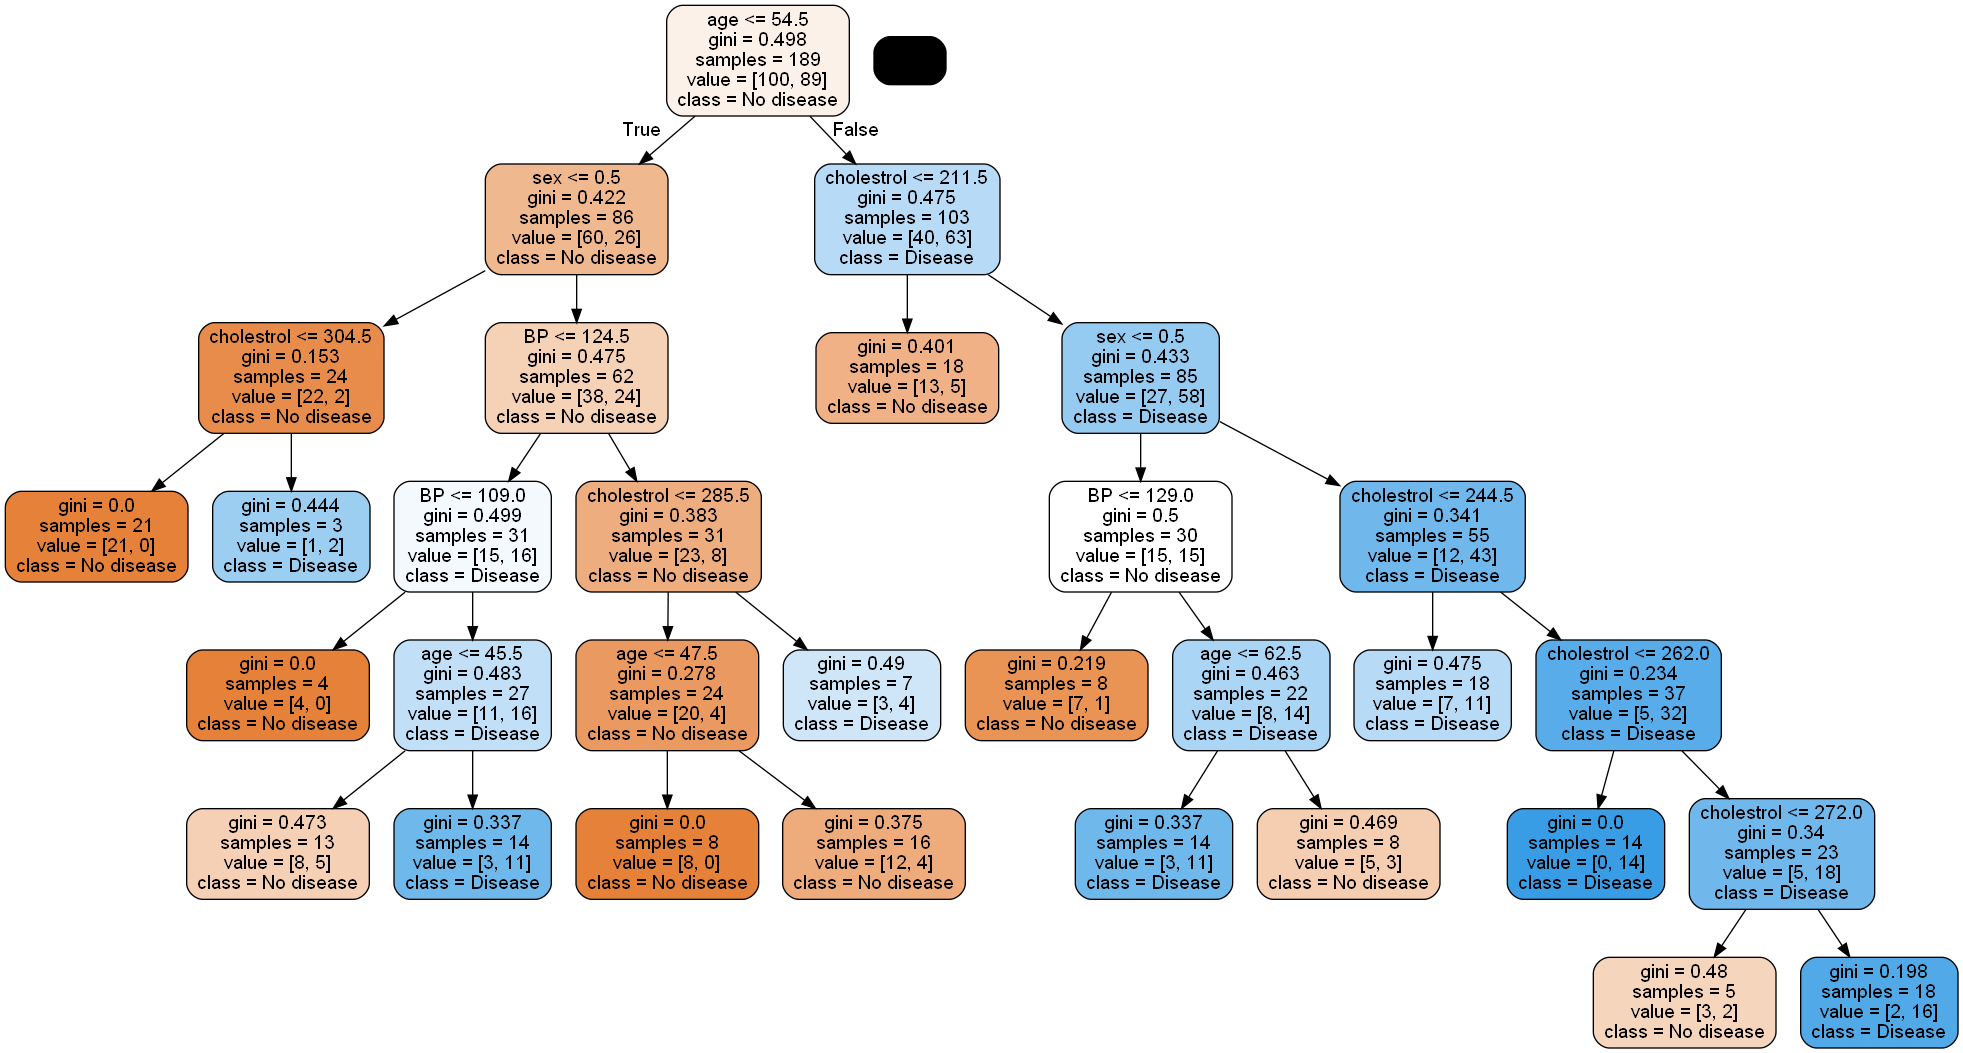

In [105]:
Graph3=get_graph(dt_3)
Image(Graph3.create_png())

In [106]:
evaluate_model(dt_3)

Train set Accuracy 0.7936507936507936
Confusion matrix for train set
[[81 19]
 [20 69]]
--------
Test set Accuracy 0.654320987654321
Confusion matrix for test set
[[37 13]
 [15 16]]


##### Controlling min_samples_leaf = 20

In [107]:
dt_4 = DecisionTreeClassifier(min_samples_leaf=20)
dt_4.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20)

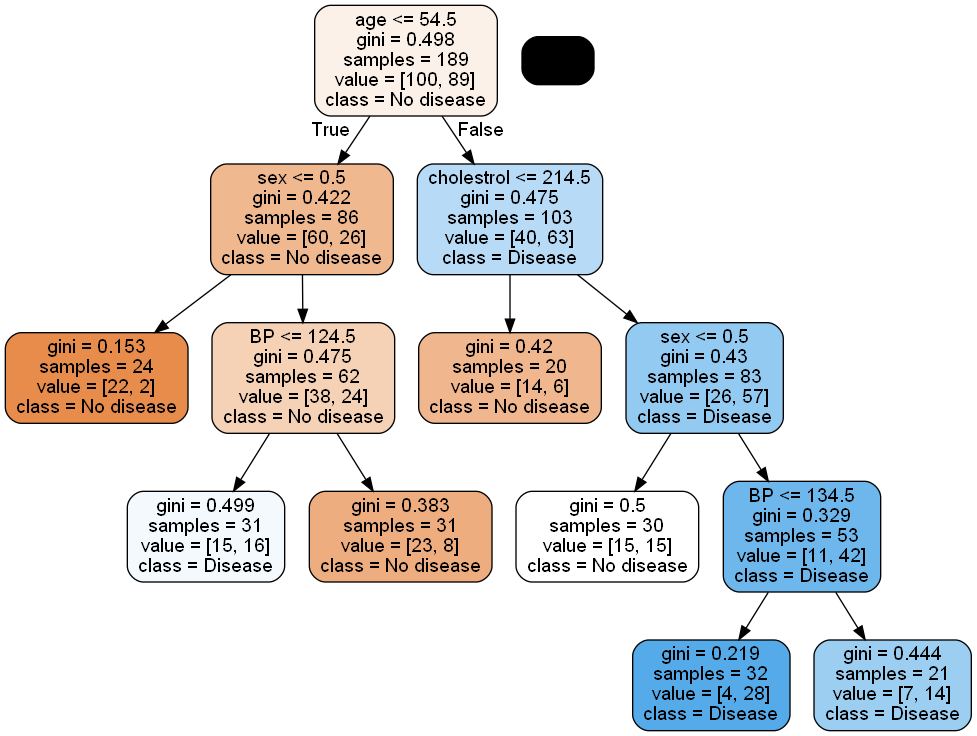

In [108]:
Graph4 = get_graph(dt_4)
Image(Graph4.create_png())

In [109]:
evaluate_model(dt_4)

Train set Accuracy 0.6984126984126984
Confusion matrix for train set
[[74 26]
 [31 58]]
--------
Test set Accuracy 0.654320987654321
Confusion matrix for test set
[[36 14]
 [14 17]]


##### Using Entropy:

In [110]:
dt_5 = DecisionTreeClassifier(min_samples_split=20,random_state=50, criterion="entropy")

In [111]:
dt_5.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=50)

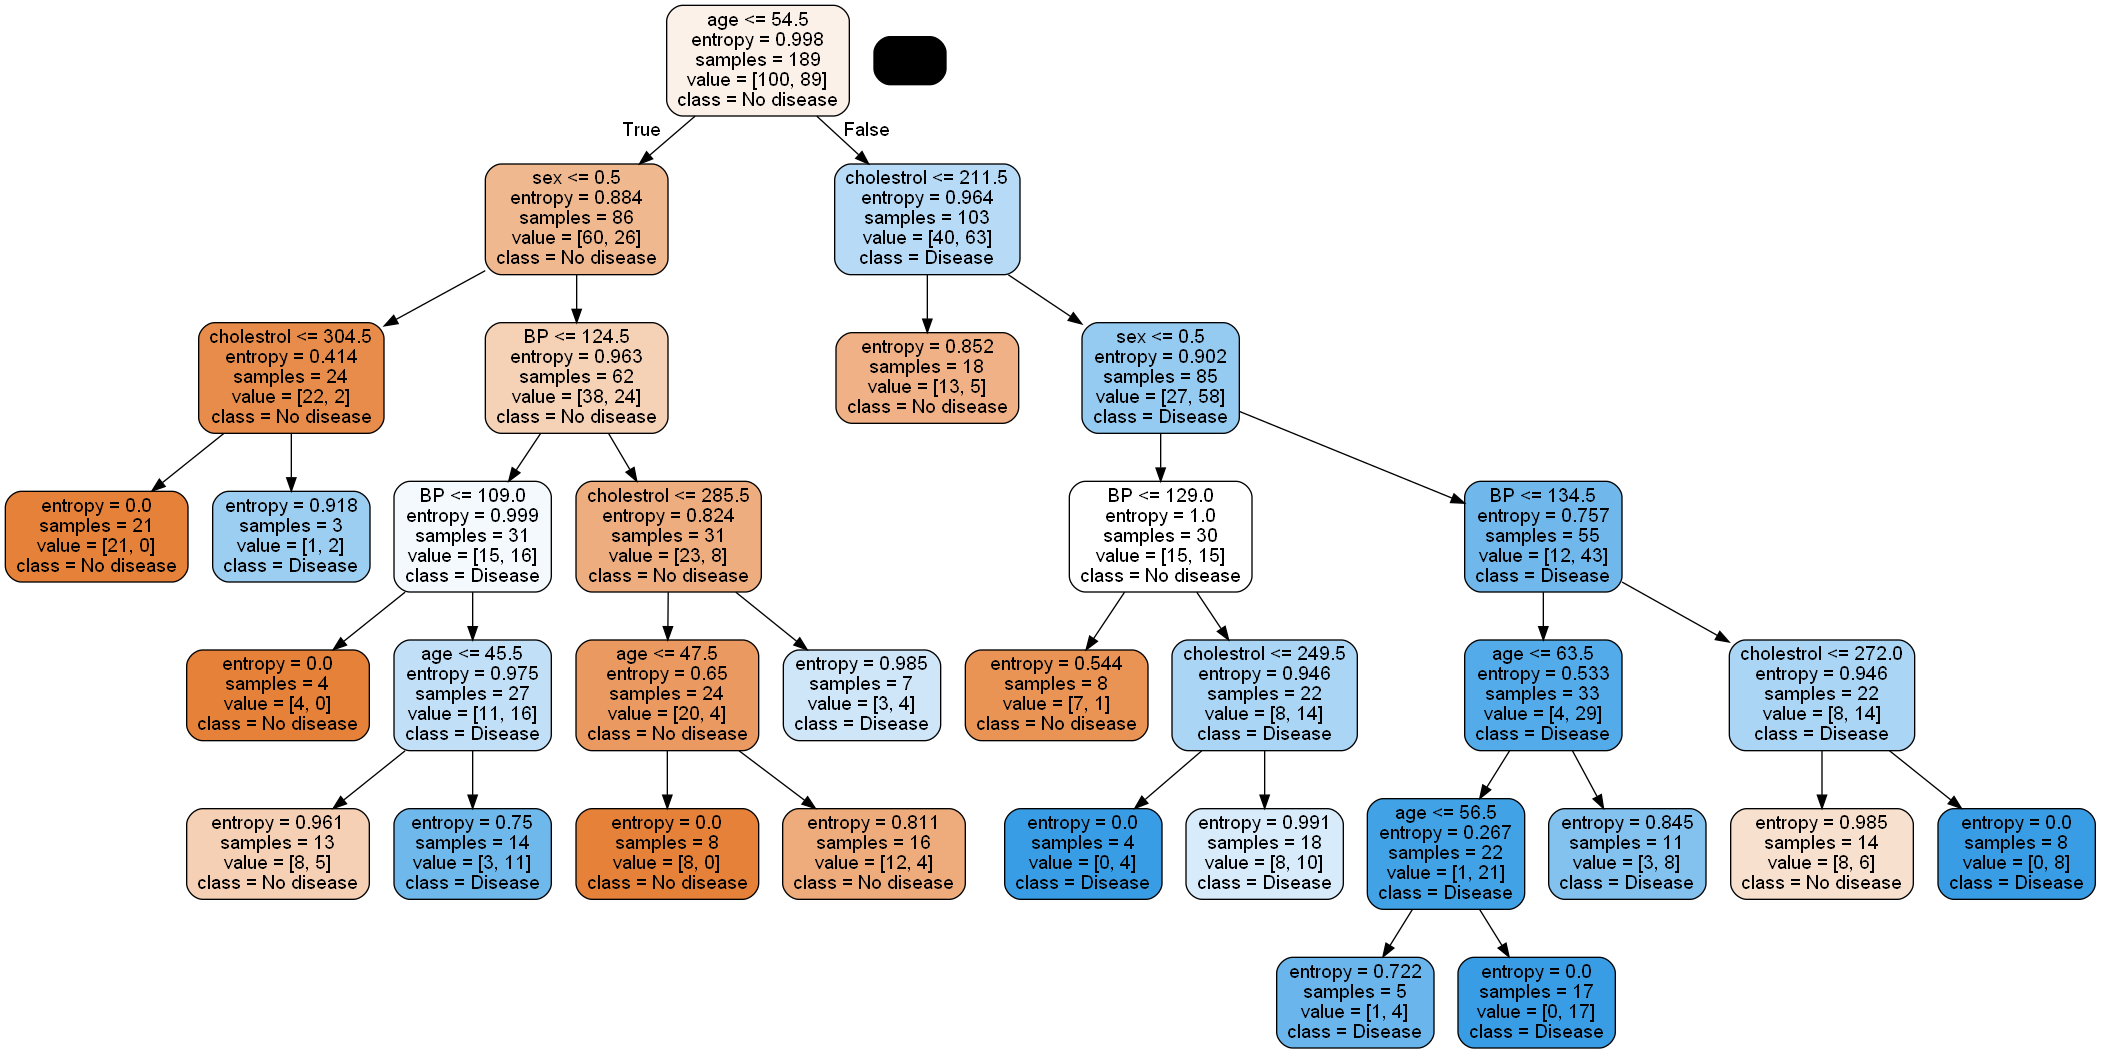

In [112]:
Graph5 = get_graph(dt_5)
Image(Graph5.create_png())

In [113]:
evaluate_model(dt_5)

Train set Accuracy 0.7883597883597884
Confusion matrix for train set
[[81 19]
 [21 68]]
--------
Test set Accuracy 0.5925925925925926
Confusion matrix for test set
[[33 17]
 [16 15]]


##### Hyper- Parameter Tuning

In [114]:
dt_tuning = DecisionTreeClassifier(random_state=50)


In [115]:
from sklearn.model_selection import GridSearchCV

In [119]:
# Creating the parameter grid based onthe results of the random search:
params = {"max_depth":[2,3,5,10,20], "min_samples_leaf":[5,10,20,50,100],
          "criterion":["gini", "entropy"]}

In [120]:
#instatiate the grid search model:
grid_search = GridSearchCV(estimator=dt_tuning, param_grid=params, cv=4,n_jobs=-1,
                           verbose=1,scoring="accuracy")

In [121]:
%%time
grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 448 ms


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=50), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [125]:
score =pd.DataFrame(grid_search.cv_results_)

In [126]:
score.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005186,0.000468,0.002989,0.000006,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.750000,0.553191,0.659574,0.595745,0.639628,0.074123,21
1,0.005237,0.000431,0.002991,0.000701,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.750000,0.553191,0.659574,0.595745,0.639628,0.074123,21
2,0.004536,0.002150,0.005944,0.002564,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.510638,0.617021,0.595745,0.607934,0.070316,31
3,0.006959,0.002474,0.003513,0.002318,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.574468,0.702128,0.659574,0.650709,0.046877,7
4,0.007111,0.001228,0.004761,0.000476,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.520833,0.531915,0.531915,0.531915,0.529145,0.004798,41


In [127]:
score.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
10,0.004291,0.007433,0.007672,0.007779,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.6875,0.553191,0.680851,0.723404,0.661237,0.064446,1
15,0.008858,0.008858,0.004191,0.007259,gini,10,5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.6875,0.553191,0.680851,0.723404,0.661237,0.064446,1
20,0.004366,0.006424,0.004189,0.006692,gini,20,5,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.6875,0.553191,0.680851,0.723404,0.661237,0.064446,1
35,0.013593,0.014266,0.006244,0.007996,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.6875,0.553191,0.659574,0.723404,0.655918,0.063478,4
40,0.004416,0.007088,0.006976,0.006976,entropy,10,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.6875,0.553191,0.659574,0.723404,0.655918,0.063478,4


In [128]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=50)

In [129]:
dt_best = grid_search.best_estimator_

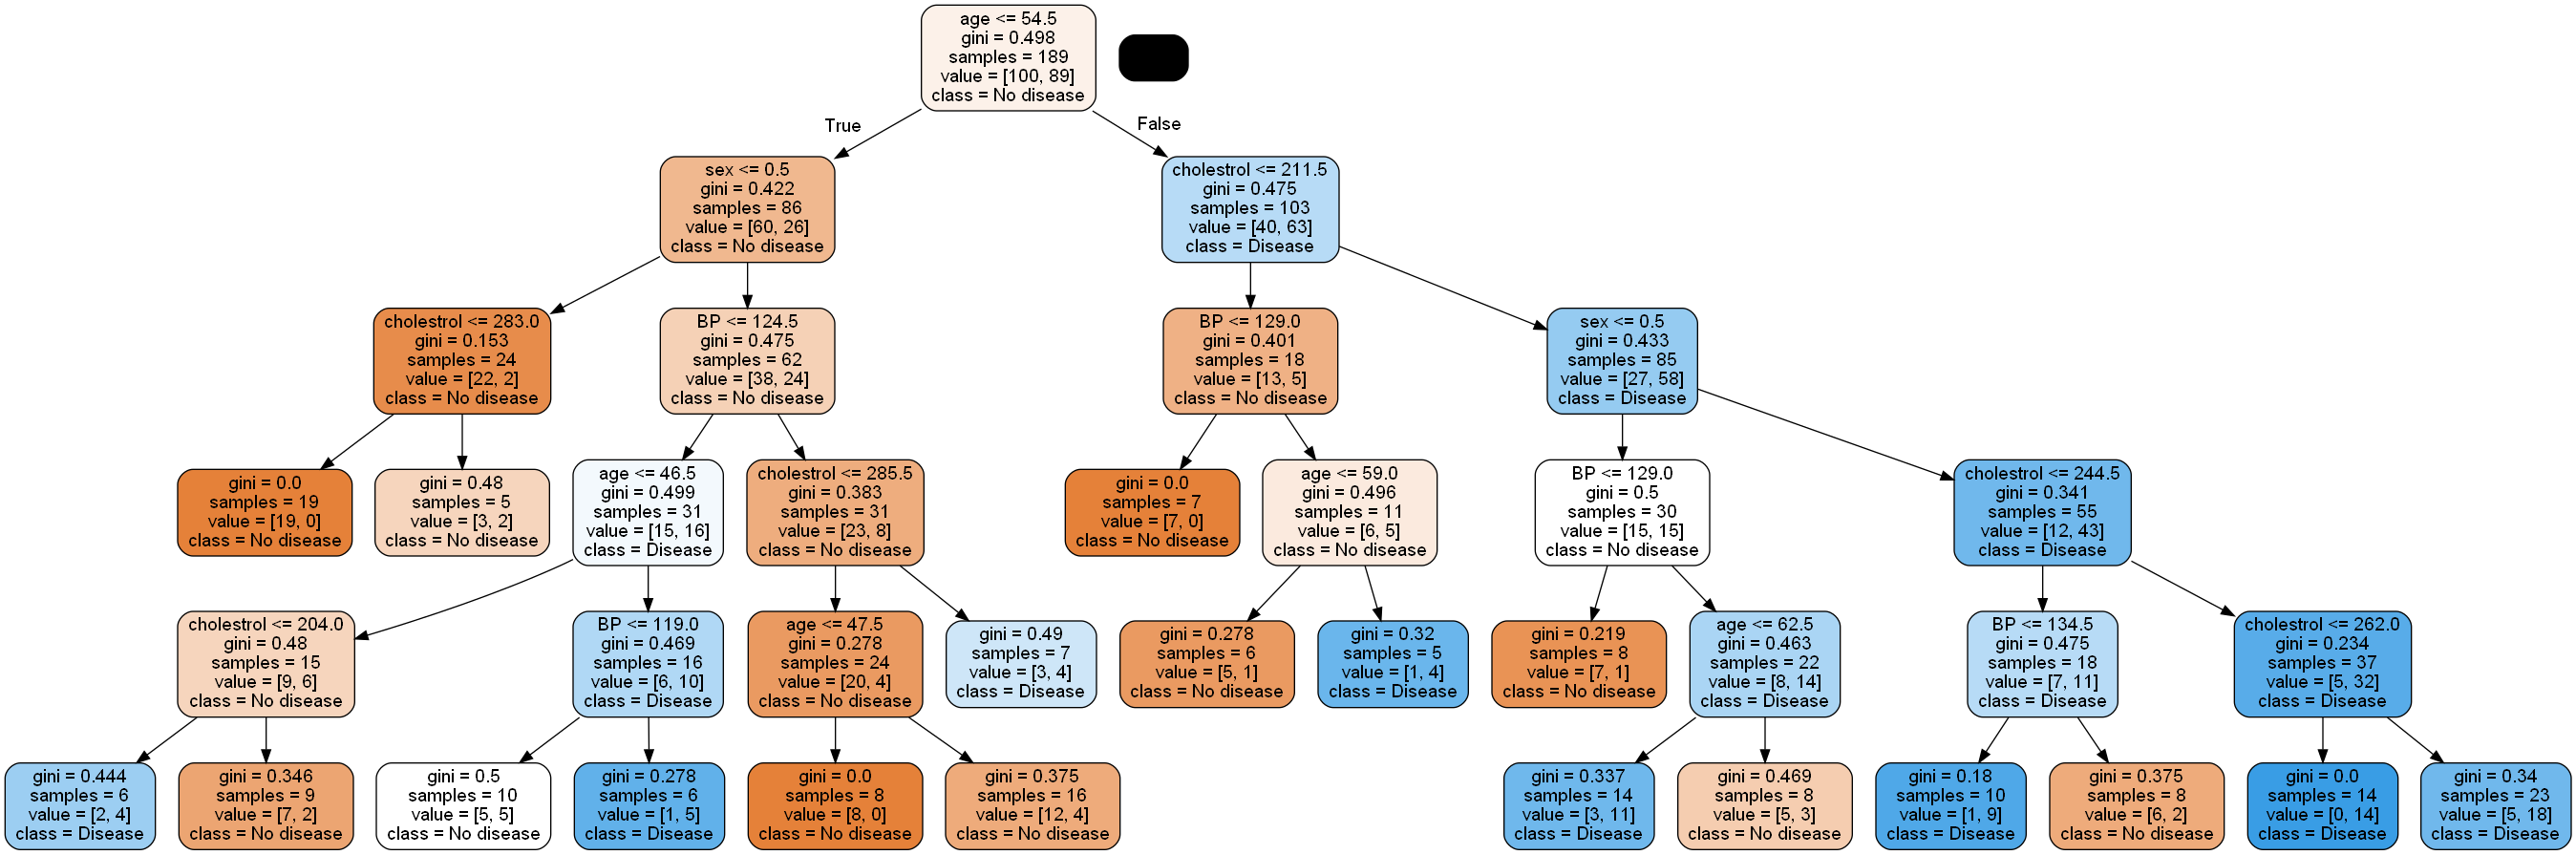

In [130]:
Graph_best = get_graph(dt_best)
Image(Graph_best.create_png())

In [131]:
evaluate_model(dt_best)

Train set Accuracy 0.8095238095238095
Confusion matrix for train set
[[84 16]
 [20 69]]
--------
Test set Accuracy 0.7037037037037037
Confusion matrix for test set
[[39 11]
 [13 18]]


In [132]:
from sklearn.metrics import classification_report

In [133]:
print(classification_report(y_test,dt_best.predict(x_test)))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        50
           1       0.62      0.58      0.60        31

    accuracy                           0.70        81
   macro avg       0.69      0.68      0.68        81
weighted avg       0.70      0.70      0.70        81

